In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

['test/01-1-activityAnnotation.txt', 'test/rgb-01-1.avi', 'test/timestamps-01-1.txt']
(200, 270)


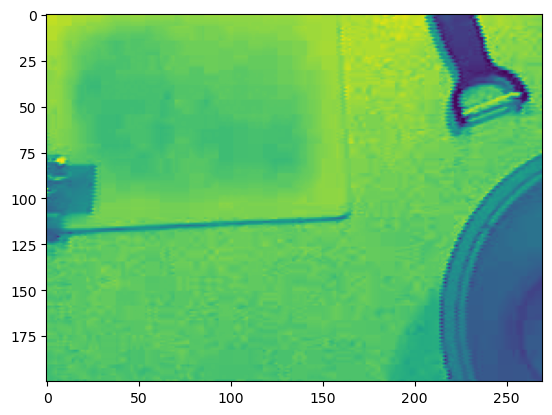

In [7]:
def get_files_from_folders(folder_paths):
    all_files = []
    for folder_path in folder_paths:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                all_files.append(file_path)
    return all_files

folder1 = "test/"

file_paths = get_files_from_folders([folder1])
print(file_paths)
v = 1
time = 2
ann = 0
cap = cv2.VideoCapture(file_paths[v])
frames = []
success,image = cap.read()
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
width, height = image.shape
cropped_img = image[((height-350)//2):((height+50)//2), ((width-60)//2):((width+480)//2)]
plt.imshow(cropped_img)
print(cropped_img.shape)

In [5]:
def get_files_from_folders(folder_paths):
    all_files = []
    for folder_path in folder_paths:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                all_files.append(file_path)
    return all_files

folder1 = "test"

file_paths = get_files_from_folders([folder1])
v = 1
time = 2
ann = 0
cap = cv2.VideoCapture(file_paths[v])
frames = []
success,image = cap.read()
while success:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    width, height = image.shape
    img = image[((height-350)//2):((height+60)//2), ((width-130)//2):((width-220)//2)+((width+400)//2)]
    w, h = img.shape
    frames.append(img)  
    success,image = cap.read()
times = []
with open(file_paths[time], "r") as file:
    for line in file:
        times.append(int(line.split(' ')[0]))
acts = []
act = []
with open(file_paths[ann], "r") as file:
    count = 0
    for line in file:
        if count >= 2:
            acts.append([int(line.split(' ')[0]), int(line.split(' ')[1])])
            act.append(line.strip().split(' ')[2])
        count += 1
f = []
count = 0
labels = []
for t in range(len(times)):
    f.append(0)
    for i in range(len(acts)):
        if acts[i][0] <= times[t] <= acts[i][1]:
            if f[t] == 0:
                count += 1
                labels.append(act[i])
            f[t] = 1
aframes = []
for j in range(len(times)):
    if f[j] == 1:
        aframes.append(frames[j])
fram = np.array(aframes)
print(fram.shape)
print(fram[0])
print(np.array(labels).shape)
print(labels)

(9176, 205, 395)
[[200 206 202 ... 111 110 110]
 [206 210 207 ... 108 110 110]
 [206 213 210 ... 110 110 110]
 ...
 [178 183 183 ...  94  92  89]
 [178 183 183 ...  94  92  89]
 [178 183 183 ...  94  92  89]]
(9176,)
['cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cut_tomato_prep', 'cu

In [ ]:
def get_files_from_folders(folder_paths):
    all_files = []
    for folder_path in folder_paths:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                all_files.append(file_path)
    return all_files

folder1 = "C:/Users/kykyk/Downloads/rgb/rgb/"
folder2 = "C:/Users/kykyk/Downloads/ann-ts/timestamps/"
folder3 = "C:/Users/kykyk/Downloads/ann-ts/activityAnnotations/"

file_paths = get_files_from_folders([folder1, folder2, folder3])
v = 0
time = 51
ann = 101
cap = cv2.VideoCapture(file_paths[v])
frames = []
success,image = cap.read()
while success:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    width, height = image.shape
    img = image[((height-350)//2):((height+50)//2), ((width-70)//2):((width+510)//2)]
    w, h = img.shape
    frames.append(img.reshape(w*h))  
    success,image = cap.read()
times = []
with open(file_paths[time], "r") as file:
    for line in file:
        times.append(int(line.split(' ')[0]))
acts = []
act = []
with open(file_paths[ann], "r") as file:
    count = 0
    for line in file:
        if count >= 2:
            acts.append([int(line.split(' ')[0]), int(line.split(' ')[1])])
            act.append(line.strip().split(' ')[2])
        count += 1
f = []
count = 0
labels = []
for t in range(len(times)):
    f.append(0)
    for i in range(len(acts)):
        if acts[i][0] <= times[t] <= acts[i][1]:
            if f[t] == 0:
                count += 1
                labels.append(act[i])
            f[t] = 1
aframes = []
for j in range(len(times)):
    if f[j] == 1:
        aframes.append(frames[j])
fram = np.array(aframes)
v += 1
time += 1
ann += 1
print(fram.shape)
for i in range(10):
    print(i)
    cap = cv2.VideoCapture(file_paths[v])
    frames = []
    success,image = cap.read()
    while success:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        width, height = image.shape
        img = image[((height-350)//2):((height+50)//2), ((width-70)//2):((width+510)//2)]
        w, h = img.shape
        frames.append(img.reshape(w*h)) 
        success,image = cap.read()
    times = []
    with open(file_paths[time], "r") as file:
        for line in file:
            times.append(int(line.split(' ')[0]))
    acts = []
    act = []
    with open(file_paths[ann], "r") as file:
        count = 0
        for line in file:
            if count >= 2:
                acts.append([int(line.split(' ')[0]), int(line.split(' ')[1])])
                act.append(line.strip().split(' ')[2])
            count += 1
    f = []
    count = 0
    labels = []
    for t in range(len(times)):
        f.append(0)
        for i in range(len(acts)):
            if acts[i][0] <= times[t] <= acts[i][1]:
                if f[t] == 0:
                    count += 1
                    labels.append(act[i])
                f[t] = 1
    aframes = []
    for j in range(len(times)):
        if f[j] == 1:
            aframes.append(frames[j])
    v += 1
    time += 1
    ann += 1
    print(np.array(aframes).shape)
    fram = np.vstack((fram, np.array(aframes)))
    print(fram.shape)